## Assignment: PCA Implementation

# Objective:
The objective of this assignment is to implement PCA on a given dataset and analyse the results.

# Instructions:
* Download the wine dataset from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Wine).

* Load the dataset into a Pandas dataframe.
* Split the dataset into features and target variables.
* Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
* Implement PCA on the preprocessed dataset using the scikit-learn library.
* Determine the optimal number of principal components to retain based on the explained variance ratio.
* Visualise the results of PCA using a scatter plot.
* Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
* Interpret the results of PCA and clustering analysis.

# Deliverables:
* Jupyter notebook containing the code for the PCA implementation.
* A report summarising the results of PCA and clustering analysis.
* Scatter plot showing the results of PCA.
* A table showing the performance metrics for the clustering algorithm.

# Additional Information:
* You can use the python
* You can use any other machine learning libraries or tools as necessary.
* You can use any visualisation libraries or tools as necessary.


## Assignment Solution Outline: PCA Implementation on the Wine Dataset


## Load the Dataset into a Pandas DataFrame
Use the pandas library to read the dataset into a DataFrame.


In [4]:
import pandas as pd

# Load the dataset directly from the UCI Machine Learning Repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wine_data = pd.read_csv(url, header=None)

# Display the first few rows of the dataset
wine_data.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


##  Split the Dataset into Features and Target Variables
* Assign the first column as the target variable (y).
* Assign the remaining columns as the features (X).


In [5]:
# Split into features and target
X = wine_data.iloc[:, 1:]
y = wine_data.iloc[:, 0]


##  Data Preprocessing
* Scaling: Standardize the features using StandardScaler from scikit-learn.
*Missing Value Imputation: Not necessary for the Wine dataset as it does not contain missing values.


In [6]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 5. Implement PCA
* Use PCA from scikit-learn to perform Principal Component Analysis on the standardized data.
* Fit and transform the dataset with PCA.


In [7]:
from sklearn.decomposition import PCA

# Initialize PCA and fit it to the standardized data
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


##6. Determine the Optimal Number of Principal Components
Calculate the cumulative explained variance ratio to decide the optimal number of principal components to retain.


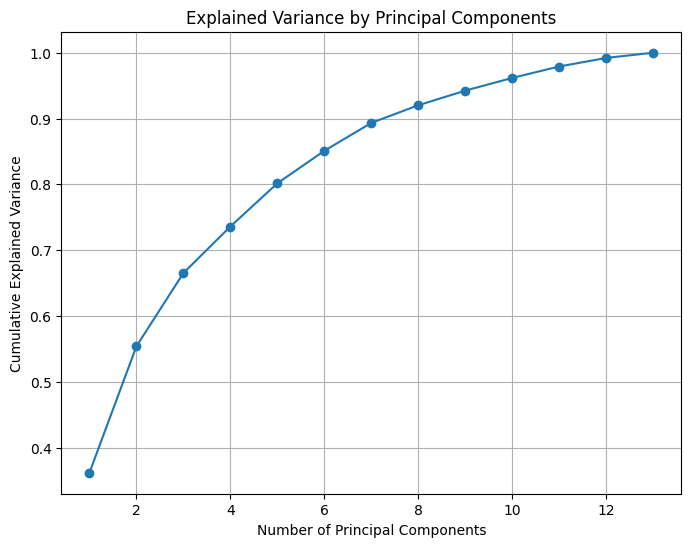

In [8]:
import matplotlib.pyplot as plt
# Explained variance
explained_variance = pca.explained_variance_ratio_

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


## 7. Visualise the Results of PCA
* Create a scatter plot for the first two principal components.


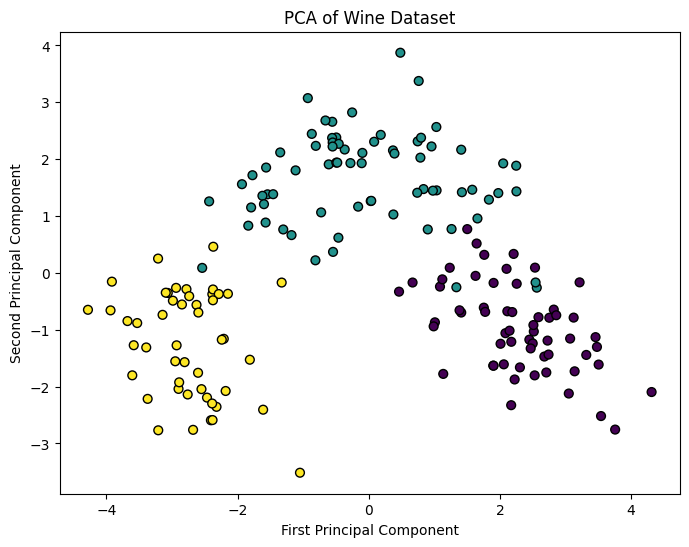

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.title('PCA of Wine Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


##8. Perform Clustering on PCA-Transformed Data
* Apply K-Means clustering on the PCA-transformed data using KMeans from scikit-learn.


In [10]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca[:, :2])  # Use first two principal components


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [11]:
# Predict the cluster labels
cluster_labels = kmeans.predict(X_pca[:, :2])


## 9. Interpret the Results of PCA and Clustering Analysis
* Compare the clustering results with the original target classes.
* Evaluate clustering performance using metrics such as the silhouette score, adjusted Rand index, etc.


In [12]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Calculate silhouette score
silhouette_avg = silhouette_score(X_pca[:, :2], cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.2f}')


Silhouette Score: 0.56


In [13]:
# Adjusted Rand Index
ari = adjusted_rand_score(y, cluster_labels)
print(f'Adjusted Rand Index: {ari:.2f}')


Adjusted Rand Index: 0.90


## Conclusion
This outline provides a comprehensive guide to completing the PCA implementation assignment. Make sure to follow each step carefully, document your code, and provide clear explanations in your notebook and report.





